In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [233]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [234]:
df_train.columns

# it seems it has too many values out side the box

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [235]:
df_train.Reputation = np.log1p(df_train.Reputation)
df_test.Reputation = np.log1p(df_test.Reputation)

In [236]:
df_train.Answers = np.log1p(df_train.Answers)
df_test.Answers = np.log1p(df_test.Answers)

In [237]:
df_train.Views = np.log1p(df_train.Views)
df_test.Views = np.log1p(df_test.Views)

In [238]:
df_train.Upvotes = np.log1p(df_train.Upvotes)

In [239]:
mm = MinMaxScaler()

In [240]:
df_train.Reputation = mm.fit_transform(df_train[['Reputation']])
df_test.Reputation = mm.transform(df_test[['Reputation']])

In [241]:
df_train.Views = mm.fit_transform(df_train[['Views']])
df_test.Views = mm.transform(df_test[['Views']])

In [242]:
df_train.Answers = mm.fit_transform(df_train[['Answers']])
df_test.Answers = mm.transform(df_test[['Answers']])

<AxesSubplot:ylabel='Density'>

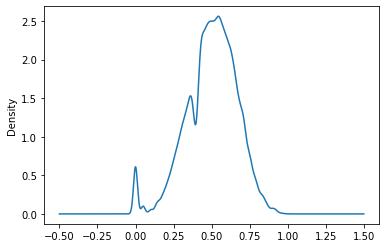

In [232]:
df_train.Reputation.plot(kind='kde')

In [243]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [244]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [245]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8290223391558331

In [250]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

0.761784619171301

In [251]:
df_pred = model.predict(df_test)
df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('logonall_rf_results.csv',index=False)

<AxesSubplot:ylabel='Density'>

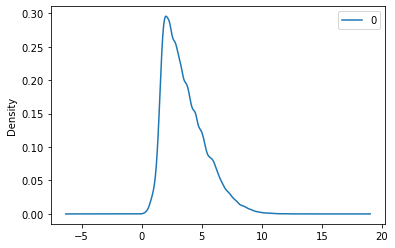

In [198]:
pd.DataFrame(model.predict(df_test)).plot(kind='kde')

In [221]:
X_train.describe()

,Reputation,Answers,Views,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
count,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000,264036.000000
mean,6.944570,1.415746,8.966706,0.219277,0.062412,0.097862,0.219103,0.043956,0.131971,0.037840,0.070577,0.021232
std,2.302730,0.565916,1.776880,0.413757,0.241903,0.297128,0.413639,0.204998,0.338459,0.190808,0.256118,0.144157
min,0.000000,0.000000,2.772589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.641907,1.098612,7.860185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.120444,1.386294,9.099967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.537976,1.791759,10.199668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.857064,4.343805,15.470124,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Trying normal

In [253]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [254]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

In [255]:
df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [256]:
X = df_train.drop(columns=['Upvotes'])
y = df_train.Upvotes

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8704274114927795

In [259]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1410.2455708498478

In [261]:
df_pred = model.predict(df_test)
#df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('nothing_results.csv',index=False)

### Suggestion from medium 


In [437]:
df_train = pd.read_csv("train_NIR5Yl1.csv")
df_test = pd.read_csv("test_8i3B3FC.csv")

In [438]:
df_train.drop(columns=['Username','ID'], inplace=True)
df_test.drop(columns=['Username','ID'],inplace=True)

<AxesSubplot:xlabel='Tag'>

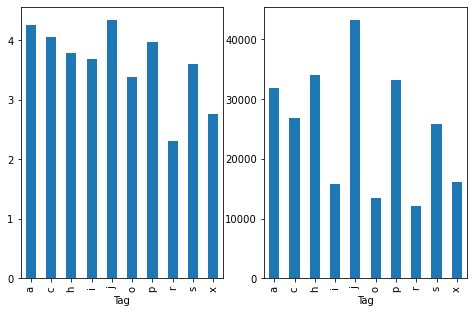

In [439]:
m = df_train.groupby('Tag').mean()

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)

m['Answers'].plot(kind='bar')


plt.subplot(1,2,2)

m['Views'].plot(kind='bar')

In [440]:
from sklearn.preprocessing import LabelEncoder, Binarizer

In [441]:
b = Binarizer(threshold=4)

In [442]:
df_train['watched'] = b.fit_transform(df_train[['Answers']])
df_test['watched'] = b.fit_transform(df_test[['Answers']])

In [443]:
df_train['watched'].value_counts()

0.0    235605
1.0     94440
Name: watched, dtype: int64

In [444]:
le = LabelEncoder()

In [445]:
df_train['Tag'] = le.fit_transform(df_train['Tag'])
df_test['Tag'] = le.transform(df_test['Tag'])

# df_train = pd.get_dummies(df_train, columns=['Tag'], drop_first=True)
# df_test = pd.get_dummies(df_test, columns=['Tag'], drop_first=True)

In [446]:
df_train

,Tag,Reputation,Answers,Views,Upvotes,watched
0,0,3942.0,2.0,7855.0,42.0,0.0
1,0,26046.0,12.0,55801.0,1175.0,1.0
2,1,1358.0,4.0,8067.0,60.0,0.0
3,0,264.0,3.0,27064.0,9.0,0.0
4,1,4271.0,4.0,13986.0,83.0,0.0
...,...,...,...,...,...,...
330040,1,36.0,2.0,1063.0,0.0,0.0
330041,1,1649.0,2.0,23319.0,73.0,0.0
330042,1,6178.0,2.0,2453.0,15.0,0.0
330043,4,89.0,2.0,2107.0,3.0,0.0


In [447]:
X = df_train.drop(columns=['Upvotes'])

In [448]:
y = df_train.Upvotes

In [449]:
df_test.shape, X.shape

((141448, 5), (330045, 5))

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [451]:
mm = StandardScaler()

In [452]:
X_train = mm.fit_transform(X_train)

In [453]:
X_test = mm.transform(X_test)
df_test = mm.transform(df_test)

In [454]:
df_test.shape, X_test.shape, X_train.shape

((141448, 5), (66009, 5), (264036, 5))

In [455]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model

In [456]:
# pol = PolynomialFeatures(degree=4, interaction_only=False, include_bias=True)

# X_p = pol.fit_transform(X_train)

# pol.fit(X_train, y_train)

# lin_reg = linear_model.LassoLars(alpha=0.021, max_iter=150)

# lin_reg.fit(X_p, y_train)'

In [457]:
# pred = pol.fit_transform(X_test)

# pred_val = lin_reg.predict(pred)

# print(r2_score(y_test, pred_val))

In [458]:
# Lets try with randomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV


model = XGBRegressor()

n_estimators = [100,600,1500]
max_depth = [2,9,15]
booster = ['gbtree']
learning_rate = [0.02,0.1,0.2]
min_child_weight = [1,3,6]
base_score = [0.2,0.6,1]

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight':min_child_weight,
    'booster': booster,
    'base_score': base_score   
    
}


random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,
                              cv= 5, n_iter = 10,
                              scoring = 'neg_root_mean_squared_error',
                              n_jobs = 4,
                              verbose = 5,
                              return_train_score = True,
                              random_state= 42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 36.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [428]:
model = XGBRegressor(base_score=0.6, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=np.nan, monotone_constraints='()',
             n_estimators=600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9199068262009071

In [429]:
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1108.7558613982421

In [430]:
df_pred = model.predict(df_test)
#df_pred = np.expm1(df_pred)
df_final= pd.DataFrame([pd.read_csv("test_8i3B3FC.csv")['ID'],df_pred])
df_final=df_final.T
df_final.columns = ['ID','Upvotes']
df_final.to_csv('medium_results.csv',index=False)